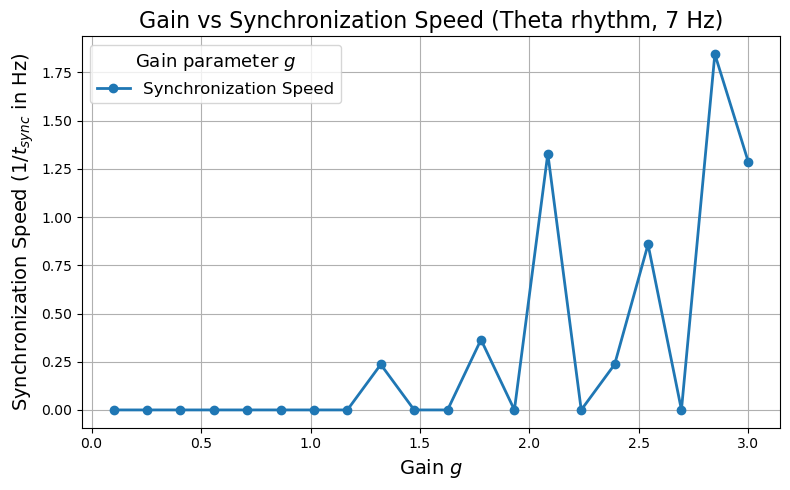

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Simulation Parameters --------
rhythm = 'theta'  # choose 'theta' or 'gamma'
frequency_hz = 7 if rhythm == 'theta' else 60
omega = 2 * np.pi * frequency_hz  # natural frequency in rad/s

T = 5.0                # total simulation time in seconds
dt = 0.0005            # time step in seconds (0.5 ms)
N = int(T / dt)        # number of time steps
sigma = 0.5            # noise amplitude
threshold = 0.05       # sync threshold for phase difference (rad)

g_values = np.linspace(0.1, 3, 20)  # gain values to test
sync_speeds = []

# -------- PRC --------
def Z(theta):
    return np.sin(theta)  # typical Type-II PRC

def wrap_phase(phi):
    return (phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, π]

# -------- Simulation Loop --------
for g in g_values:
    theta1 = np.random.uniform(0, 2*np.pi)
    theta2 = theta1 + 0.2  # small initial phase offset

    xi = np.random.normal(0, 1, size=N)  # shared noise

    for i in range(N):
        theta1 += omega * dt + sigma * g * Z(theta1) * np.sqrt(dt) * xi[i]
        theta2 += omega * dt + sigma * g * Z(theta2) * np.sqrt(dt) * xi[i]
        theta1 = theta1 % (2 * np.pi)
        theta2 = theta2 % (2 * np.pi)

        phi = wrap_phase(theta1 - theta2)
        if abs(phi) < threshold:
            sync_time = i * dt
            sync_speed = 1.0 / sync_time
            break
    else:
        sync_speed = 0.0  # did not synchronize

    sync_speeds.append(sync_speed)

# -------- Plotting --------
plt.figure(figsize=(8, 5))
plt.plot(g_values, sync_speeds, 'o-', linewidth=2, markersize=6, label='Synchronization Speed')
plt.xlabel('Gain $g$', fontsize=14)
plt.ylabel('Synchronization Speed ($1/t_{sync}$ in Hz)', fontsize=14)
plt.title(f'Gain vs Synchronization Speed ({rhythm.capitalize()} rhythm, {frequency_hz} Hz)', fontsize=16)
plt.grid(True)
plt.legend(title='Gain parameter $g$', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()
